# Tutorial file for the r-place-emergence package

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rplacem.canvas_part as rp
import rplacem.thermo as th
import pickle
import os
import seaborn as sns

### Choose an index from the atlas.json file to identify a composition of interest

The r/place [atlas](https://place-atlas.stefanocoding.me/about)
"is an atlas aiming to chart all the artworks created during the r/place April Fools event on Reddit in 2022. It is made with information to each artwork of the canvas provided by the community. The original code was developed by Roland Rytz and is available under the free AGPL license on GitHub. The currently maintained version of the website is managed by Stefano Haagmans and is obtainable under the same license within a [GitHub fork](https://github.com/placeAtlas/atlas). Initial images are provided by Alex Tsernoh."

Each "artwork" or as we call it here, "composition", is indexed according to a string of numbers, found in the atlas.json file. Here, we choose one arbitrarily for demonstration

In [2]:
atlas_id_index = '000006' 

### Load all the pixel data from the npz file

Next, we load all the pixel change data from the npz file. This npz file is a condensed, time-sorted version of the 79 data files provided by reddit from the 2022 r/place experiment. The get_all_pixel_changes() function loads this data and places it into a pandas dataframe

In [3]:
pixel_changes_all = rp.get_all_pixel_changes()

Print the columns of the pixel_changes_all dataframe for reference

In [4]:
pixel_changes_all.columns

Index(['seconds', 'x_coord', 'y_coord', 'user_index', 'color_index',
       'moderator_event'],
      dtype='object')

### Define two types of CanvasPart objects

The CanvasPart class is a superclass with subclasses CanvasComposition and CanvasArea. You can think of a CanvasPart as a part of the canvas defined by a spatial border, which can be either defined by the edge of a particular artwork composition as defined by the r/place Atlas or it can be defined by an arbitrary user-defined border path, which can take any shape. The maximum size of a user-defined border is the size of the canvas itself. 

##### Define a CanvasCompsition object

To define a CanvasComposition object, you must supply the atlas composition id index and the pixel change data loaded from the npz file. The constructor then finds and sets the border path, the x and y coordinates inside the border, and the pixel changes within the border of the composition. 

In [5]:
canvas_comp = rp.CanvasComposition(atlas_id_index, pixel_changes_all)

In [6]:
print('Canvas composition pixel changes: \n' + str(canvas_comp.pixel_changes) + '\n \n')
print('Canvas composition border path: \n' + str(canvas_comp.border_path) + '\n \n')
print('Canvas composition x coordinates: \n' + str(canvas_comp.x_coords) + '\n \n')
print('Canvas composition y coordinates: \n' + str(canvas_comp.y_coords) + '\n \n')

Canvas composition pixel changes: 
           seconds  x_coord  y_coord   user_id  color_R  color_G  color_B
0         1219.603      911      421   2367073      0.0      0.0      0.0
1         1226.869      912      421   1159668    126.0    237.0     86.0
2         1231.680      913      421   3054718    126.0    237.0     86.0
3         1233.864      911      422   2701904      0.0      0.0      0.0
4         1239.272      911      425   2710114      0.0      0.0      0.0
...            ...      ...      ...       ...      ...      ...      ...
124981  300505.608      911      470   6331348    255.0    255.0    255.0
124982  300510.618      936      454   1108705    255.0    255.0    255.0
124983  300511.144      950      422  10380382    255.0    255.0    255.0
124984  300553.777      949      427    521579    255.0    255.0    255.0
124985  300558.739      935      474   8959978    255.0    255.0    255.0

[124986 rows x 7 columns]
 

Canvas composition border path: 
[[913 421]
 [9

##### Define a CanvasArea object
To define a CanvasArea object, you must supply the border path and the pixel changes from the npz file. 
The border path is a numpy array of x,y points that form the path of the border of the canvas

In [7]:
border_path = np.array([[0,0],[0,10],[10,10],[10,0]])

canvas_area = rp.CanvasArea(border_path, pixel_changes_all)

In [8]:
print('Canvas area pixel changes: \n' + str(canvas_area.pixel_changes) + '\n \n')
print('Canvas area border path: \n' + str(canvas_area.border_path) + '\n \n')
print('Canvas area x coordinates: \n' + str(canvas_area.x_coords)+ '\n \n')
print('Canvas area y coordinates: \n' + str(canvas_area.y_coords)+ '\n \n')

Canvas area pixel changes: 
           seconds  x_coord  y_coord  user_id  color_R  color_G  color_B
0           21.703        2        2  4068948    212.0    215.0    217.0
1          169.534        0        0  4068955    255.0    168.0      0.0
2          490.058        1        1  4068959    255.0     69.0      0.0
3         1181.441        1        3  1700572     54.0    144.0    234.0
4         1184.738        0        0  1644551    255.0     69.0      0.0
...            ...      ...      ...      ...      ...      ...      ...
197533  300588.756        0        0  7913751    255.0    255.0    255.0
197534  300588.987        0        0   227097    255.0    255.0    255.0
197535  300589.027        0        0  1256236    255.0    255.0    255.0
197536  300589.360        0        1   364556    255.0    255.0    255.0
197537  300589.387        0        0  1295679    255.0    255.0    255.0

[197538 rows x 7 columns]
 

Canvas area border path: 
[[ 0  0]
 [ 0 10]
 [10 10]
 [10  0]]
 



### Get the pixel changes over time, plot, and save a movie of the frames

Now, we can start to examine how the two CanvasPart objects change over time. 
Lets' choose a time step interval of 900 seconds (15 minutes), and a total time 
of 20 hours (20*3600 seconds).

In [9]:
time_interval= 900 #seconds
total_time = 20*3600 #seconds

First, let's plot the canvas_comp object for the specified time steps. You'll notice the plotting function returns a list of indices that allow us to quickly select the pixel change data at different time points inside the boundary. The time_inds_list_comp will come in handy for time-step calculations later on. 

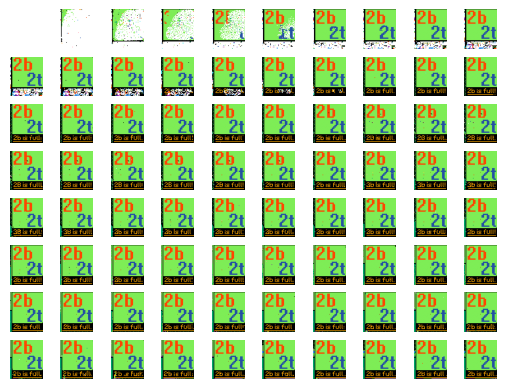

In [10]:
time_inds_list_comp = rp.show_part_over_time(canvas_comp,
                                        time_interval,
                                        total_time = total_time)

We can do the same for the canvas_area object

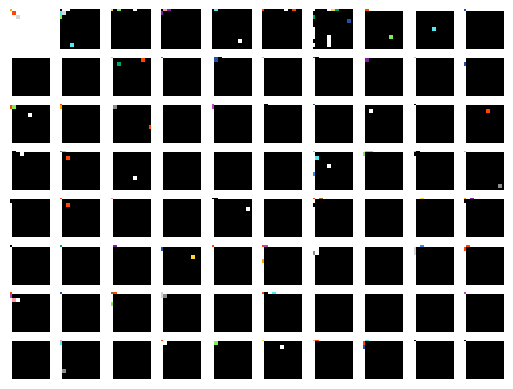

In [11]:
time_inds_list_area = rp.show_part_over_time(canvas_area,
                                             time_interval,
                                             total_time = total_time)

### Plot the compressed file size ratio over time

Next, we'll perform calculations to further analyze the CanvasPart objects. We can use the compressed file size as a way to characterize the 'complexity' of a part of the canvas. We'll plot the ratio of the compressed file size to the original file size for both the canvas composition and the canvas area

##### Calculate and plot file size ratio for canvas_comp object

In [12]:
image_path = os.path.join(os.getcwd(), 'tutorial_images')

file_size_bmp, file_size_png = rp.save_and_compress(canvas_comp, time_inds_list_comp, image_path)

Save frames as a movie

In [13]:
rp.save_movie(image_path, 
              movie_tool='moviepy',
              fps=1,
              codec='libx264',
              video_type='mp4')

Moviepy - Building video /Users/annie/Code/Repositories/r-place-emergence/tutorial_images/frames56_fps1.mp4.
Moviepy - Writing video /Users/annie/Code/Repositories/r-place-emergence/tutorial_images/frames56_fps1.mp4



Moviepy - Done !
Moviepy - video ready /Users/annie/Code/Repositories/r-place-emergence/tutorial_images/frames56_fps1.mp4


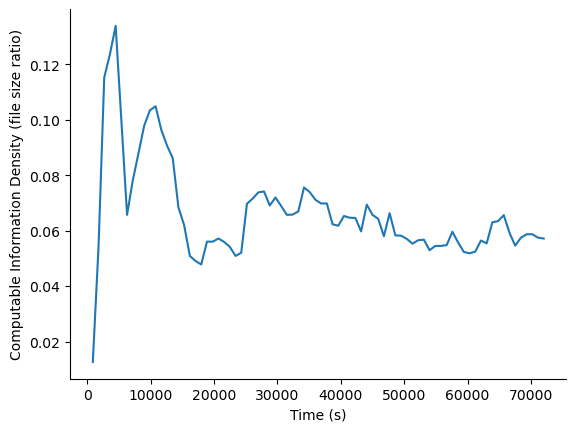

In [14]:
rp.plot_compression(file_size_bmp, file_size_png, time_interval, total_time)

As you can see, there are some interesting trends here...and there is much more you can calculate and look at

#### Saving and loading the timestep data

In [15]:
rp.save_canvas_part_time_steps(canvas_comp, 
                                pixel_changes_all, 
                                time_inds_list_comp,
                                time_interval,
                                file_size_bmp,
                                file_size_png)

In [16]:
(canvas_comp, 
 pixel_changes_all, 
 time_inds_list_comp,
 time_interval,
 file_size_bmp,
 file_size_png) = rp.load_canvas_part_time_steps()

#### Calculate number of pixel changes and touched pixels for thermodynamic quantities


In [17]:
(num_pixel_changes, 
num_changed_pixels, 
num_pixel_changes_per_interval,
num_changed_pixels_per_interval,
num_users_per_interval) =  th.calc_num_pixel_changes(canvas_comp,
                                                             pixel_changes_all,
                                                             time_inds_list_comp,
                                                             time_interval)

##### Plot

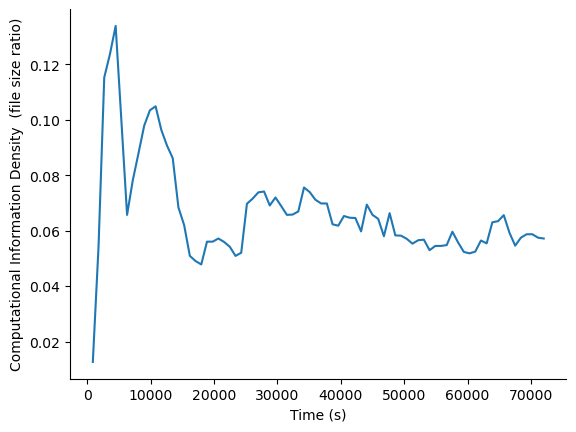

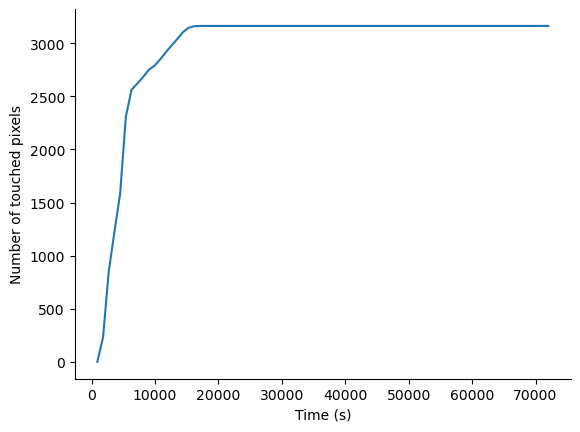

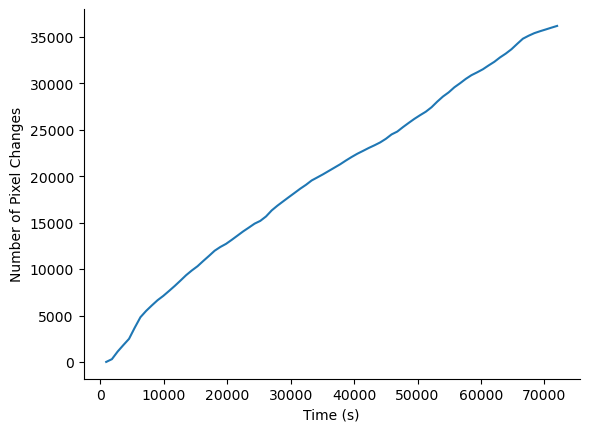

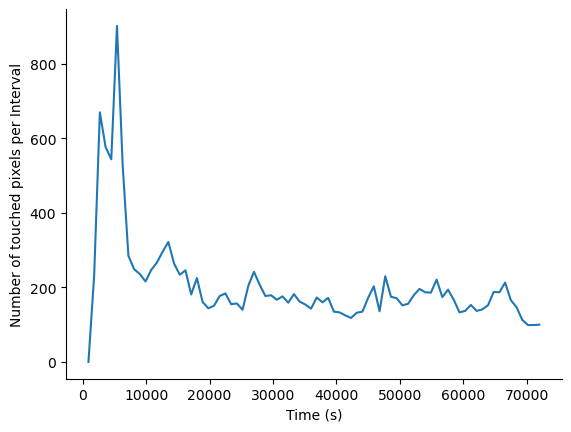

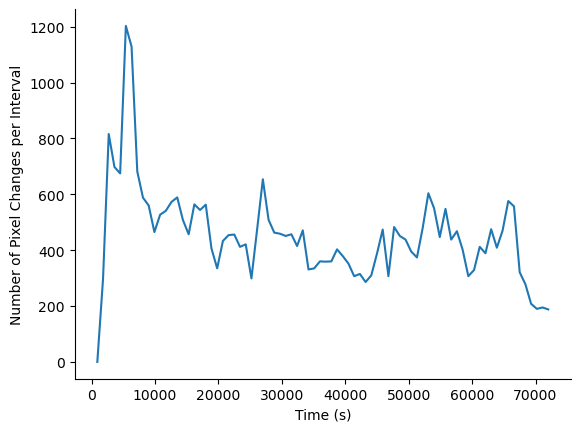

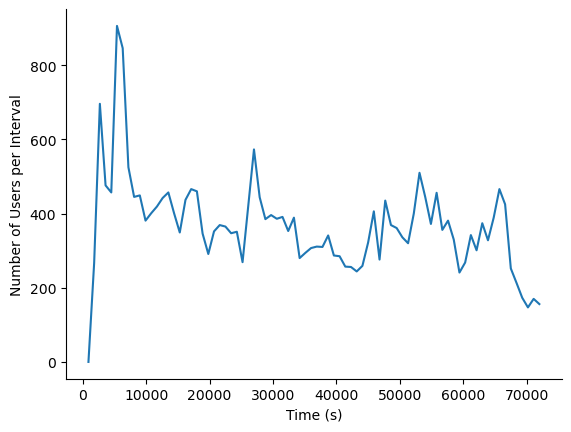

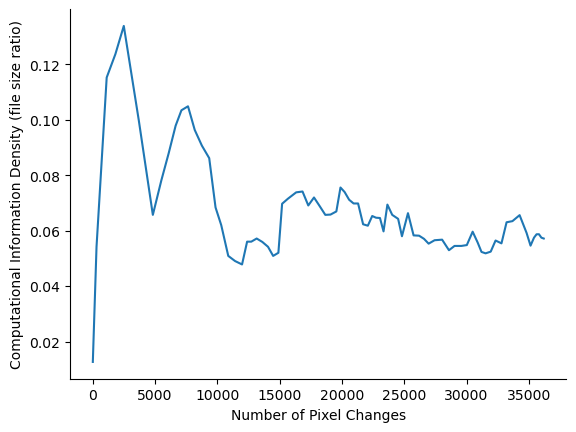

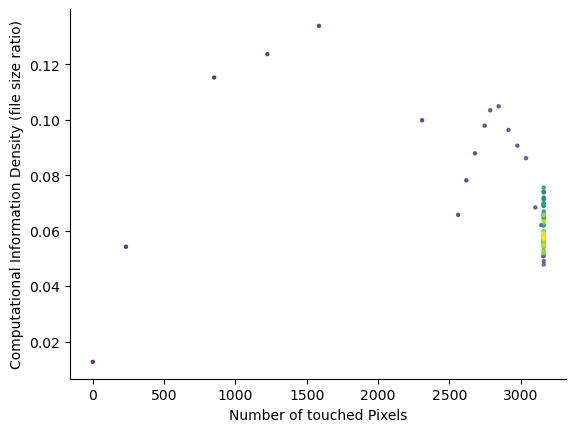

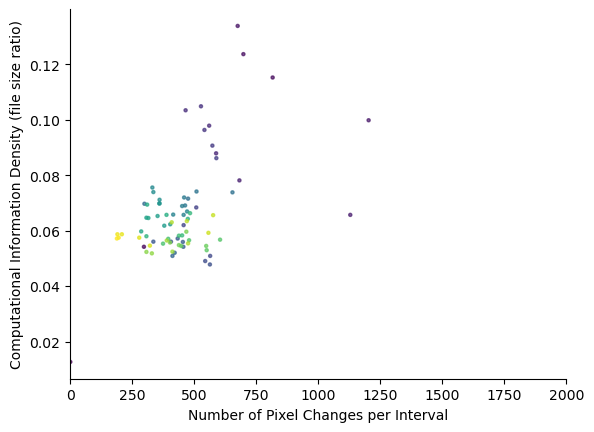

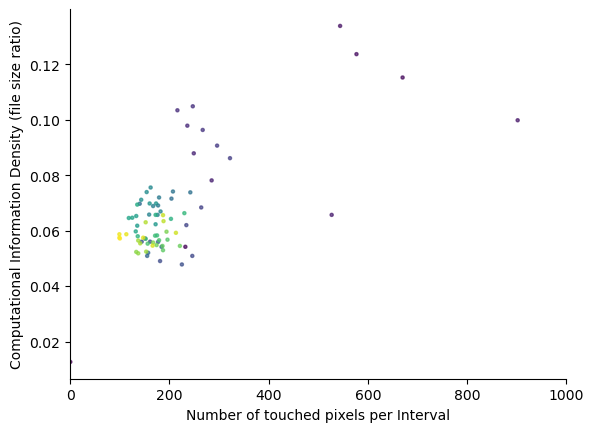

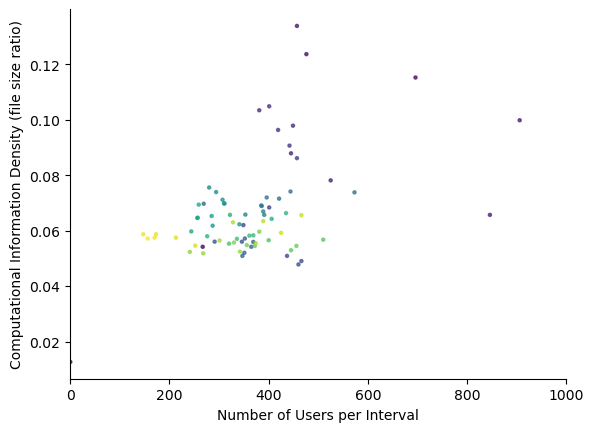

In [18]:
(fig_cid_vs_time, 
fig_num_changed_pix_vs_time, 
fig_num_pix_changes_vs_time, 
fig_num_pix_changes_int_vs_time, 
fig_cid_vs_num_pix_changes,
fig_cid_vs_num_changed_pix,
fig_cid_vs_num_pix_changes_per_interval,
fig_cid_vs_num_changed_pixels_per_interval,
fig_users_int_vs_time,
fig_cid_vs_num_users_per_interval)= th.plot_compression_vs_pixel_changes(num_pixel_changes, 
                                                                                  num_changed_pixels, 
                                                                                  num_pixel_changes_per_interval, 
                                                                                  num_changed_pixels_per_interval,
                                                                                  num_users_per_interval,
                                                                                  time_interval,
                                                                                  file_size_png, 
                                                                                  file_size_bmp)

manipulate the plots

(0.0, 5000.0)

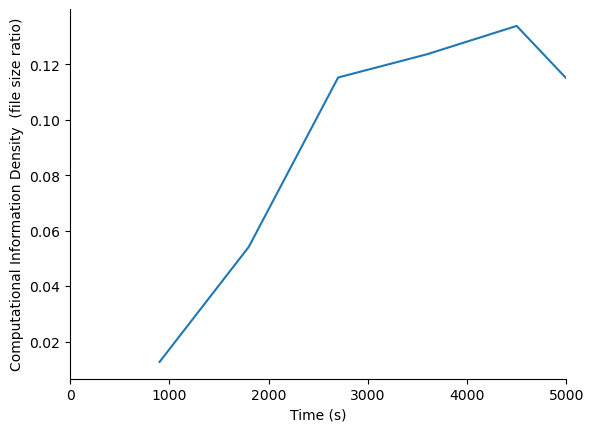

In [19]:
plt.figure()
plt.sca(fig_cid_vs_time.gca())
plt.xlim([0,5000])